### NOTEBOOK CONTENTS

- plots of how much of the domain is $\Omega_A$ undersaturated

- would it be worth it to see how much is undersaturated, not including river areas (it won't matter too much...)?

#### Production of .nc documentation is found in: carbon_dev/PI_CARBON_PAPER/location_important_extracted_calculated_quantities.txt



In [50]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [51]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [52]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import pickle

import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




In [53]:
mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

print('grid spacing in the w direction  at point y = 250, x = 250')
print(mmask['e3t_0'][0,:,250,250])
print('grid spacing in the w direction  at point y = 600, x = 200')
print(mmask['e3t_0'][0,:,600,200])



grid spacing in the w direction  at point y = 250, x = 250
[ 1.00000115  1.00000501  1.00001253  1.00002718  1.0000557   1.00011125
  1.00021946  1.0004302   1.00084067  1.00164012  1.0031971   1.00622914
  1.01213271  1.02362358  1.04597551  1.08940061  1.17356428  1.33592899
  1.64636781  2.22990285  3.29248567  5.11998508  7.97451506 11.8252972
 16.10792044 19.95870258 22.81323256 14.34398256 14.34398256 26.28684983
 26.59728865 26.75965336 26.84381704 26.88724213 26.90959407 26.92108493
 26.9269885  26.93002054 26.93157752 26.93237697]
grid spacing in the w direction  at point y = 600, x = 200
[ 1.00000115  1.00000501  1.00001253  1.00002718  1.0000557   1.00011125
  1.00021946  1.0004302   1.00084067  1.00164012  1.0031971   1.00622914
  1.01213271  1.02362358  1.04597551  1.08940061  1.17356428  1.33592899
  1.64636781  2.22990285  3.29248567  5.11998508  7.97451506 11.8252972
 16.10792044 19.95870258 22.81323256 24.64073198 25.70331479 26.28684983
 26.59728865 26.75965336 26.843

(40, 898, 398)
222394.0735048354
222394.0735048354


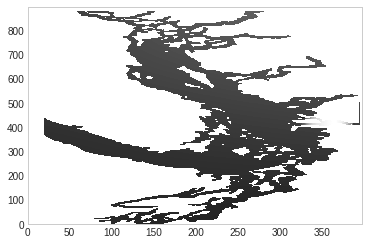

In [54]:
#print(mmask)

#print(mmask['e2t'])
#print(mmask['e3t_0'])

#dom_size = np.zeros(40,898,398)

csize = pickle.load(open('../KEY_MASBAL_LAT_TRANSPORT/pickles/cellsize_alg2.pkl', 'rb'))

print(np.shape(csize))

print(csize[0,250,250])
plt.pcolormesh(csize[0,:,:])

print(mmask['e2t'][0,250,250]*mmask['e1t'][0,250,250]*mmask['e3t_0'][0,0,250,250])

In [55]:
Oma_domain_PI = nc.Dataset('../KEY_OMA/OMA_current_NCS/PI_OmA.nc')
Oma_domain_BR = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA.nc')

In [56]:
mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tmask = mmask['tmask'][0,:,:,:]
#water - wher are cells water?
water = np.where(tmask == 1)
water_dom = (np.shape(tmask[water]))
water_cells = (water_dom[0])

water_vol = np.nansum(np.nansum(np.nansum(csize,axis = 0), axis = 1))
print(water_vol)
print(np.nansum(np.nansum(np.nansum(csize*tmask,axis = 0), axis = 1)))

PI_under_0pt5 = np.zeros(365)
PI_under_0pt6 = np.zeros(365)
PI_under_0pt7 = np.zeros(365)
PI_under_0pt8 = np.zeros(365)
PI_under_0pt9 = np.zeros(365)
PI_under_1pt0 = np.zeros(365)
PI_under_1pt1 = np.zeros(365)
PI_under_1pt2 = np.zeros(365)
PI_under_1pt3 = np.zeros(365)
PI_under_1pt4 = np.zeros(365)
PI_under_1pt5 = np.zeros(365)

for i in range(0,365):
    if(i%3 == 0):
        print(i)
    
    #taking domain omega_a for day i
    domain_oma = Oma_domain_PI['model_output']['OmA'][i,:,:,:]     

    #0.5
    #where is this water undersaturated below thres?
    where_under = np.where(domain_oma<0.5 )
    #mask while multiplying volume to get volumes of all cells where we are undersaturated
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    #print(np.shape(domain_oma_w_under))
    #print(np.shape(domain_oma_vol_under))
    #this is total undersat volume
    #print(np.nansum(domain_oma_vol_under))
    #total undersat volume / total volume
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt5[i] = perc_dom_under
    
    #0.6 -comments same as for 0.5
    where_under = np.where(domain_oma<0.6 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt6[i] = perc_dom_under

    #0.7 -comments same as for 0.5
    where_under = np.where(domain_oma<0.7 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt7[i] = perc_dom_under

    #0.8 -comments same as for 0.5
    where_under = np.where(domain_oma<0.8 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt8[i] = perc_dom_under
    
        #0.9 -comments same as for 0.5
    where_under = np.where(domain_oma<0.9 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_0pt9[i] = perc_dom_under
    
        #1 -comments same as for 0.5
    where_under = np.where(domain_oma<1 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt0[i] = perc_dom_under
    
        #1.1 -comments same as for 0.5
    where_under = np.where(domain_oma<1.1 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt1[i] = perc_dom_under
    
        #1.2 -comments same as for 0.5
    where_under = np.where(domain_oma<1.2 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt2[i] = perc_dom_under
    
        #1.3-comments same as for 0.5
    where_under = np.where(domain_oma<1.3 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt3[i] = perc_dom_under
    
        #1.4 -comments same as for 0.5
    where_under = np.where(domain_oma<1.4)
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt4[i] = perc_dom_under
    
        #1.5 -comments same as for 0.5
    where_under = np.where(domain_oma<1.5 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    PI_under_1pt5[i] = perc_dom_under
    
pickle.dump(PI_under_0pt5, open("PI_under_0pt5_vol.pkl", 'wb'))
pickle.dump(PI_under_0pt6, open("PI_under_0pt6_vol.pkl", 'wb'))
pickle.dump(PI_under_0pt7, open("PI_under_0pt7_vol.pkl", 'wb'))
pickle.dump(PI_under_0pt8, open("PI_under_0pt8_vol.pkl", 'wb'))
pickle.dump(PI_under_0pt9, open("PI_under_0pt9_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt0, open("PI_under_1pt0_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt1, open("PI_under_1pt1_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt2, open("PI_under_1pt2_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt3, open("PI_under_1pt3_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt4, open("PI_under_1pt4_vol.pkl", 'wb'))
pickle.dump(PI_under_1pt5, open("PI_under_1pt5_vol.pkl", 'wb'))

2276918328840.84
2276918328840.84
0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
240
243
246
249
252
255
258
261
264
267
270
273
276
279
282
285
288
291
294
297
300
303
306
309
312
315
318
321
324
327
330
333
336
339
342
345
348
351
354
357
360
363


In [57]:
mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tmask = mmask['tmask'][0,:,:,:]
#water - wher are cells water?
water = np.where(tmask == 1)
water_dom = (np.shape(tmask[water]))
water_cells = (water_dom[0])

water_vol = np.nansum(np.nansum(np.nansum(csize,axis = 0), axis = 1))
print(water_vol)
print(np.nansum(np.nansum(np.nansum(csize*tmask,axis = 0), axis = 1)))

BR_under_0pt5 = np.zeros(365)
BR_under_0pt6 = np.zeros(365)
BR_under_0pt7 = np.zeros(365)
BR_under_0pt8 = np.zeros(365)
BR_under_0pt9 = np.zeros(365)
BR_under_1pt0 = np.zeros(365)
BR_under_1pt1 = np.zeros(365)
BR_under_1pt2 = np.zeros(365)
BR_under_1pt3 = np.zeros(365)
BR_under_1pt4 = np.zeros(365)
BR_under_1pt5 = np.zeros(365)

for i in range(0,365):
    if(i%3 == 0):
        print(i)
    
    #taking domain omega_a for day i
    domain_oma = Oma_domain_BR['model_output']['OmA'][i,:,:,:]     

    #0.5
    #where is this water undersaturated below thres?
    where_under = np.where(domain_oma<0.5 )
    #mask while multiplying volume to get volumes of all cells where we are undersaturated
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    #print(np.shape(domain_oma_w_under))
    #print(np.shape(domain_oma_vol_under))
    #this is total undersat volume
    #print(np.nansum(domain_oma_vol_under))
    #total undersat volume / total volume
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt5[i] = perc_dom_under
    
    #0.6 -comments same as for 0.5
    where_under = np.where(domain_oma<0.6 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt6[i] = perc_dom_under

    #0.7 -comments same as for 0.5
    where_under = np.where(domain_oma<0.7 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt7[i] = perc_dom_under

    #0.8 -comments same as for 0.5
    where_under = np.where(domain_oma<0.8 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt8[i] = perc_dom_under
    
        #0.9 -comments same as for 0.5
    where_under = np.where(domain_oma<0.9 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_0pt9[i] = perc_dom_under
    
        #1 -comments same as for 0.5
    where_under = np.where(domain_oma<1 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt0[i] = perc_dom_under
    
        #1.1 -comments same as for 0.5
    where_under = np.where(domain_oma<1.1 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt1[i] = perc_dom_under
    
        #1.2 -comments same as for 0.5
    where_under = np.where(domain_oma<1.2 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt2[i] = perc_dom_under
    
        #1.3-comments same as for 0.5
    where_under = np.where(domain_oma<1.3 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt3[i] = perc_dom_under
    
        #1.4 -comments same as for 0.5
    where_under = np.where(domain_oma<1.4)
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt4[i] = perc_dom_under
    
        #1.5 -comments same as for 0.5
    where_under = np.where(domain_oma<1.5 )
    domain_oma_vol_under = domain_oma[where_under]*csize[where_under]
    perc_dom_under = np.nansum(domain_oma_vol_under)/water_vol
    BR_under_1pt5[i] = perc_dom_under
    
pickle.dump(BR_under_0pt5, open("BR_under_0pt5_vol.pkl", 'wb'))
pickle.dump(BR_under_0pt6, open("BR_under_0pt6_vol.pkl", 'wb'))
pickle.dump(BR_under_0pt7, open("BR_under_0pt7_vol.pkl", 'wb'))
pickle.dump(BR_under_0pt8, open("BR_under_0pt8_vol.pkl", 'wb'))
pickle.dump(BR_under_0pt9, open("BR_under_0pt9_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt0, open("BR_under_1pt0_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt1, open("BR_under_1pt1_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt2, open("BR_under_1pt2_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt3, open("BR_under_1pt3_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt4, open("BR_under_1pt4_vol.pkl", 'wb'))
pickle.dump(BR_under_1pt5, open("BR_under_1pt5_vol.pkl", 'wb'))

2276918328840.84
2276918328840.84
0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
240
243
246
249
252
255
258
261
264
267
270
273
276
279
282
285
288
291
294
297
300
303
306
309
312
315
318
321
324
327
330
333
336
339
342
345
348
351
354
357
360
363


## Domain mask

Text(0.5, 0.98, 'MASK of regions, input file')

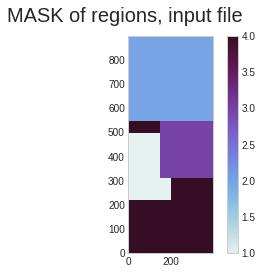

In [81]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('MASK of regions, input file',fontsize=20)


In [83]:
Oma_domain_PI = nc.Dataset('../KEY_OMA/OMA_current_NCS/PI_OmA.nc')
Oma_domain_BR = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA.nc')

In [ ]:
BR_under_0pt5 = pickle.load(open('./BR_under_0pt5.pkl', 'rb'))   
BR_under_0pt7 = pickle.load(open('./BR_under_0pt7.pkl', 'rb'))   
BR_under_1 = pickle.load(open('./BR_under_1.pkl', 'rb')) 
BR_under_1pt3 = pickle.load(open('./BR_under_1pt3.pkl', 'rb')) 
BR_under_1pt5 = pickle.load(open('./BR_under_1pt5.pkl', 'rb')) 

PI_under_0pt5 = pickle.load(open('./PI_under_0pt5.pkl', 'rb'))   
PI_under_0pt7 = pickle.load(open('./PI_under_0pt7.pkl', 'rb'))   
PI_under_1 = pickle.load(open('./PI_under_1.pkl', 'rb')) 
PI_under_1pt3 = pickle.load(open('./PI_under_1pt3.pkl', 'rb')) 
PI_under_1pt5 = pickle.load(open('./PI_under_1pt5.pkl', 'rb')) 

In [89]:
##code for getting what % of domain cells are undersaturated

# BR_under_0pt5 = np.zeros(365)
# BR_under_0pt7 = np.zeros(365)
# BR_under_1 = np.zeros(365)
# BR_under_1pt3 = np.zeros(365)
# BR_under_1pt5 = np.zeros(365)

# for i in range(0,365):
#     if(i%5 == 0):
#         print(i)
#     domain_oma = Oma_domain_BR['model_output']['OmA'][i,:,:,:]
#     domain_oma_w = domain_oma[water]
    
#     where_under = np.where(domain_oma_w<0.5)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_0pt5[i] = undersat/water_cells

#     where_under = np.where(domain_oma_w<0.7)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_0pt7[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_1[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1.3)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_1pt3[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1.5)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     BR_under_1pt5[i] = undersat/water_cells

# pickle.dump(BR_under_0pt5, open("BR_under_0pt5.pkl", 'wb'))
# pickle.dump(BR_under_0pt7, open("BR_under_0pt7.pkl", 'wb'))
# pickle.dump(BR_under_1, open("BR_under_1.pkl", 'wb'))
# pickle.dump(BR_under_1pt3, open("BR_under_1pt3.pkl", 'wb'))
# pickle.dump(BR_under_1pt5, open("BR_under_1pt5.pkl", 'wb'))

# mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# tmask = mmask['tmask'][0,:,:,:]
# water = np.where(tmask == 1)
# first_test = Oma_domain_PI['model_output']['OmA'][0,:,:,:]
# first_test_w = first_test[water]
# water_dom = np.shape(first_test_w)

# water_cells = (water_dom[0])

# where_under = np.where(first_test_w<2)
# first_test_w_under = first_test_w[where_under]
# print(np.shape(first_test_w))
# print(np.shape(first_test_w_under))


# PI_under_0pt5 = np.zeros(365)
# PI_under_0pt7 = np.zeros(365)
# PI_under_1 = np.zeros(365)
# PI_under_1pt3 = np.zeros(365)
# PI_under_1pt5 = np.zeros(365)

# for i in range(0,365):
#     if(i%5 == 0):
#         print(i)
#     domain_oma = Oma_domain_PI['model_output']['OmA'][i,:,:,:]
#     domain_oma_w = domain_oma[water]
    
#     where_under = np.where(domain_oma_w<0.5)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_0pt5[i] = undersat/water_cells

#     where_under = np.where(domain_oma_w<0.7)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_0pt7[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_1[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1.3)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_1pt3[i] = undersat/water_cells
    
#     where_under = np.where(domain_oma_w<1.5)
#     domain_oma_w_under = domain_oma_w[where_under]
#     under = np.shape(domain_oma_w_under)
#     undersat = under[0]
#     PI_under_1pt5[i] = undersat/water_cells
    
# pickle.dump(PI_under_0pt5, open("PI_under_0pt5.pkl", 'wb'))
# pickle.dump(PI_under_0pt7, open("PI_under_0pt7.pkl", 'wb'))
# pickle.dump(PI_under_1, open("PI_under_1.pkl", 'wb'))
# pickle.dump(PI_under_1pt3, open("PI_under_1pt3.pkl", 'wb'))
# pickle.dump(PI_under_1pt5, open("PI_under_1pt5.pkl", 'wb'))

Text(0.5, 0, 'days')

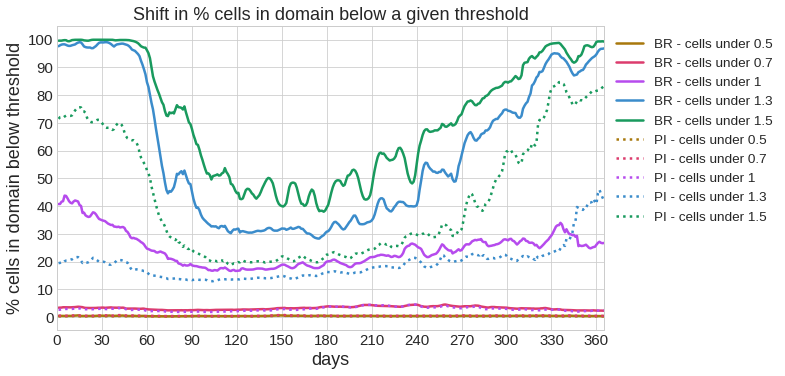

In [109]:
days = np.arange(1,366,1)
tcm = cm.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(14*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)

#months
ax1.plot(days,BR_under_0pt5*100,\
        color = tcm(1.*0/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
ax1.plot(days,BR_under_0pt7*100,\
        color = tcm(1.*1/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
ax1.plot(days,BR_under_1*100,\
        color = tcm(1.*2/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 1')
ax1.plot(days,BR_under_1pt3*100,\
        color = tcm(1.*3/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
ax1.plot(days,BR_under_1pt5*100,\
        color = tcm(1.*4/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')

ax1.plot(days,PI_under_0pt5*100,\
        color = tcm(1.*0/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.5')
ax1.plot(days,PI_under_0pt7*100,\
        color = tcm(1.*1/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.7')
ax1.plot(days,PI_under_1*100,\
        color = tcm(1.*2/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 1')
ax1.plot(days,PI_under_1pt3*100,\
        color = tcm(1.*3/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.3')
ax1.plot(days,PI_under_1pt5*100,\
        color = tcm(1.*4/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.5')

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1, 1], fontsize = fs-4.5)
#ax1.legend(loc = 'best', fontsize = fs-4.5)
# ax1.set_title('Histogram of relative proportion of $\Omega_A$ benthic values, winter months ', fontsize = fs)
# plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_ylabel('% cells in domain below threshold', fontsize = 18)
ax1.set_title('Shift in % cells in domain below a given threshold', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)

In [94]:
BR_under_1pt5*100

array([99.62142887, 99.6379166 , 99.64119567, 99.75596318, 99.82486986,
       99.7951273 , 99.47493288, 99.41189158, 99.59311801, 99.84426719,
       99.90028851, 99.93912935, 99.95053682, 99.9601893 , 99.96023548,
       99.95958891, 99.89049748, 99.74450952, 99.68640991, 99.62637057,
       99.63232832, 99.78870771, 99.90559968, 99.96439205, 99.97247427,
       99.97372124, 99.97039599, 99.96753257, 99.9630989 , 99.95210708,
       99.93289449, 99.92393478, 99.92633635, 99.9343262 , 99.93986829,
       99.93418765, 99.94093053, 99.83456853, 99.74492517, 99.79415743,
       99.85156428, 99.87345555, 99.86297175, 99.8767808 , 99.88929669,
       99.87262423, 99.85622887, 99.81267726, 99.67980558, 99.58655987,
       99.48033642, 99.29887907, 99.06403288, 98.74259149, 98.21844806,
       97.63227937, 97.35268078, 97.13552311, 97.10300949, 96.16625724,
       95.1257293 , 93.31572795, 89.96835003, 86.81055787, 84.96333213,
       83.3703499 , 81.87906507, 80.55986222, 79.0200379 , 77.46